In [3]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.3 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.3 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.8 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 2.9 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 3.3 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [8]:
features,true_labels = make_blobs(
    n_samples = 200,
    centers = 3,
    cluster_std = 2.75,
    random_state = 42,
)

In [9]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [10]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [19]:
print(f"Lowest SSE value: {kmeans.inertia_}")
print(f"Final location of centroids:\n{kmeans.cluster_centers_}")
print(f"Number of iterations to converge: {kmeans.n_iter_}")
print(f"Predicted labels for 10 points: {kmeans.labels_[:10]}")

Lowest SSE value: 74.57960106819853
Final location of centroids:
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
Number of iterations to converge: 10
Predicted labels for 10 points: [0 1 2 2 2 2 1 2 0 2]


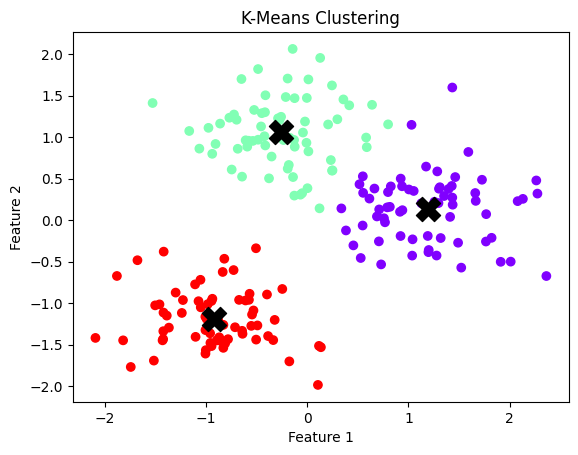

In [22]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=300, c='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


In [23]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


In [24]:
print(f"the lowest SSE value is:{min(sse)}")

the lowest SSE value is:28.200015604968435


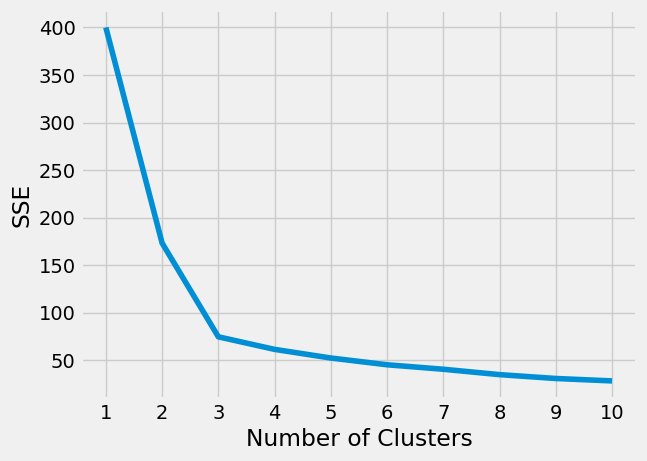

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

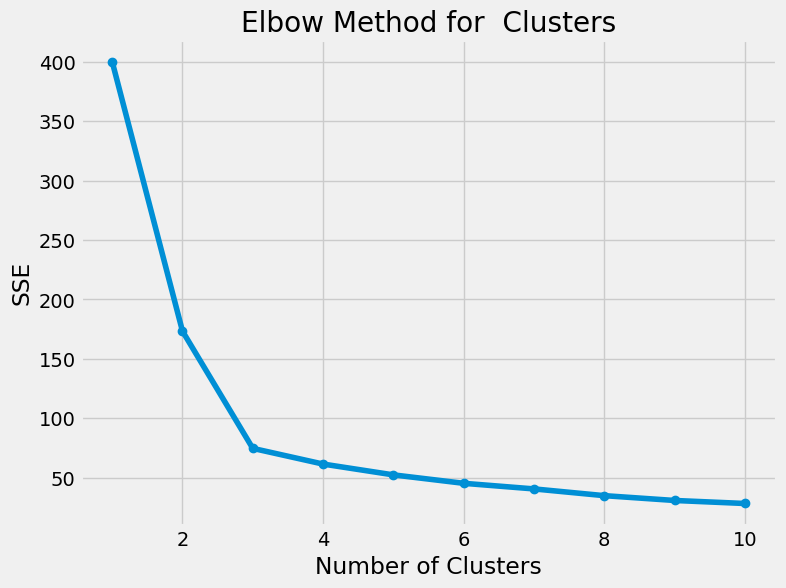

In [26]:
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for  Clusters')
plt.grid(True)
plt.show()

In [27]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    print(f"For n_clusters = {k} the silhouette coefficient is {score}")




For n_clusters = 2 the silhouette coefficient is 0.5449728784485278
For n_clusters = 3 the silhouette coefficient is 0.5915043942870359
For n_clusters = 4 the silhouette coefficient is 0.4942652789850353
For n_clusters = 5 the silhouette coefficient is 0.39172760330275125
For n_clusters = 6 the silhouette coefficient is 0.33841064280869715
For n_clusters = 7 the silhouette coefficient is 0.33874040275554307
For n_clusters = 8 the silhouette coefficient is 0.35020175625136163
For n_clusters = 9 the silhouette coefficient is 0.3650337813526654
For n_clusters = 10 the silhouette coefficient is 0.3641264983430456


In [28]:
max_silhouette_score = max(silhouette_coefficients)
optimal_k = range(2, 11)[silhouette_coefficients.index(max_silhouette_score)]
print(f"Maximum Silhouette Coefficient: {max_silhouette_score}")
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")


Maximum Silhouette Coefficient: 0.5915043942870359
Optimal number of clusters based on Silhouette Score: 3


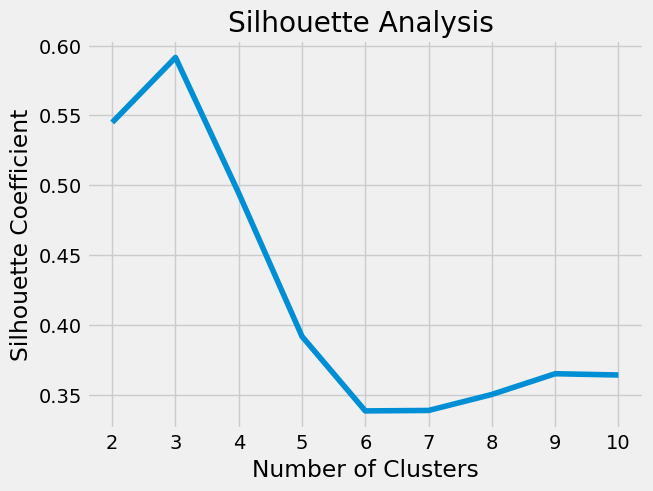

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Analysis ')
plt.show()

In [30]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(scaled_features,kmeans.labels_)
print(f"Davies Bouldin Score: {davies_bouldin}")

Davies Bouldin Score: 0.855272553457129


In [31]:
predicted_labels = kmeans.predict(scaled_features[:10])
print("Predicted labels for the first 10 data points:")
print(predicted_labels)


Predicted labels for the first 10 data points:
[3 9 1 1 1 2 5 1 7 2]


DATASET 

In [34]:
import pandas as pd
df = pd.read_csv("D:/Harshita/Credit Card Customer Data.csv")

In [35]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [36]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [42]:
df.columns


Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [43]:
df.shape

(660, 7)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [44]:

features_credit_card = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

In [45]:
scaler_credit_card = StandardScaler()
scaled_features_credit_card = scaler_credit_card.fit_transform(features_credit_card)
display(scaled_features_credit_card[:5])

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       [-0.12166518,  0.13569407, -0.86045063, -0.54748969,  0.1455276 ],
       [ 1.74018685,  0.59733368, -1.47373077,  3.20229822, -0.20373864]])

In [46]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Numerical columns: ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
Categorical columns: []


In [49]:
kmeans_credit_card = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42)
kmeans_credit_card.fit(scaled_features_credit_card)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [50]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_credit_card)
    sse.append(kmeans_credit_card.inertia_)

print(f"the lowest SSE value is:{min(sse)}")

the lowest SSE value is:933.0437490000535


In [51]:

print(f"Cluster Centers:\n{kmeans_credit_card.cluster_centers_}")
print(f"Number of iterations to converge: {kmeans_credit_card.n_iter_}")

Cluster Centers:
[[-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]]
Number of iterations to converge: 5


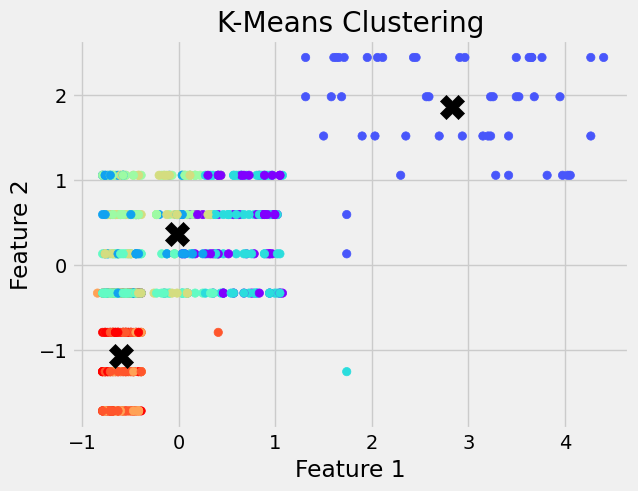

In [54]:
plt.scatter(scaled_features_credit_card[:, 0], scaled_features_credit_card[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans_credit_card.cluster_centers_[:, 0], kmeans_credit_card.cluster_centers_[:, 1], marker='X', s=300, c='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


In [55]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_credit_card)
    sse.append(kmeans.inertia_)


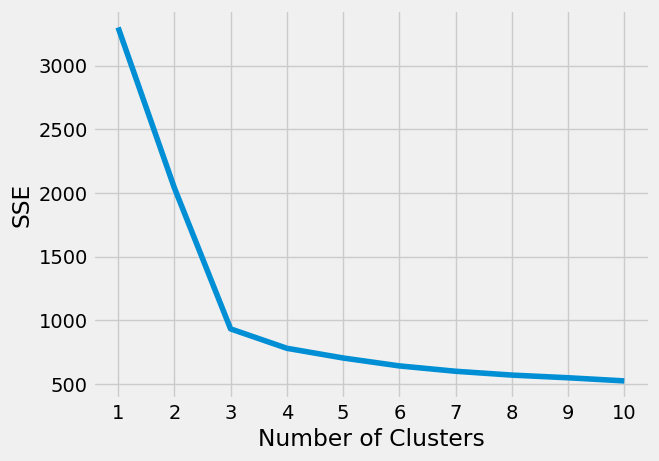

In [56]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

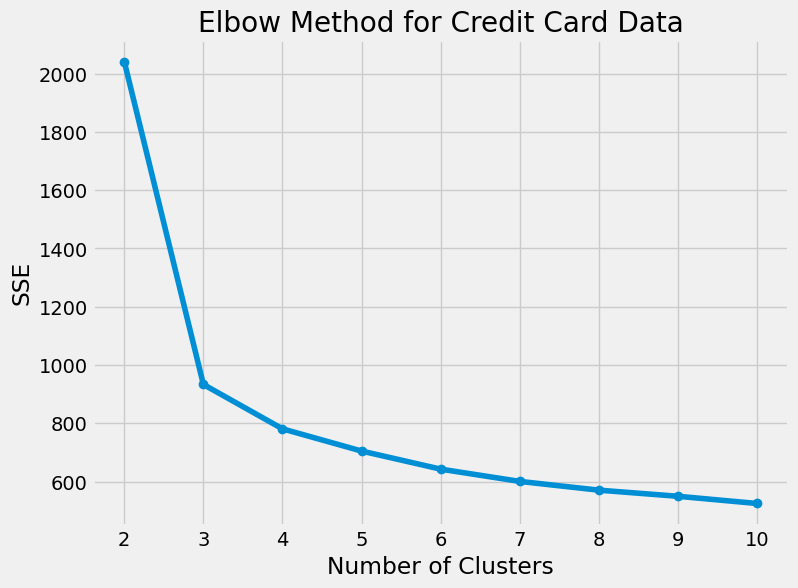

In [57]:
import matplotlib.pyplot as plt
sse = []
for k in range(2, 11):
    kmeans_credit_card = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans_credit_card.fit(scaled_features_credit_card)
    sse.append(kmeans_credit_card.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Credit Card Data')
plt.grid(True)
plt.show()

In [58]:
silhouette_coefficients_credit_card = []
for k in range(2, 11):
    kmeans_credit_card_eval = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans_credit_card_eval.fit(scaled_features_credit_card)
    score_credit_card = silhouette_score(scaled_features_credit_card, kmeans_credit_card_eval.labels_)
    silhouette_coefficients_credit_card.append(score_credit_card)
    print(f"For n_clusters = {k} the silhouette coefficient for credit card data is {score_credit_card}")

For n_clusters = 2 the silhouette coefficient for credit card data is 0.41842496663215445
For n_clusters = 3 the silhouette coefficient for credit card data is 0.5157182558881063
For n_clusters = 4 the silhouette coefficient for credit card data is 0.3556670619372605
For n_clusters = 5 the silhouette coefficient for credit card data is 0.2723982945417676
For n_clusters = 6 the silhouette coefficient for credit card data is 0.25524450457447506
For n_clusters = 7 the silhouette coefficient for credit card data is 0.24801320245613284
For n_clusters = 8 the silhouette coefficient for credit card data is 0.22618622338672714
For n_clusters = 9 the silhouette coefficient for credit card data is 0.23027960397678574
For n_clusters = 10 the silhouette coefficient for credit card data is 0.22676566960779668


In [59]:
max_silhouette_score = max(silhouette_coefficients_credit_card)
optimal_k = range(2, 11)[silhouette_coefficients_credit_card.index(max_silhouette_score)]
print(f"Maximum Silhouette Coefficient: {max_silhouette_score}")
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

Maximum Silhouette Coefficient: 0.5157182558881063
Optimal number of clusters based on Silhouette Score: 3


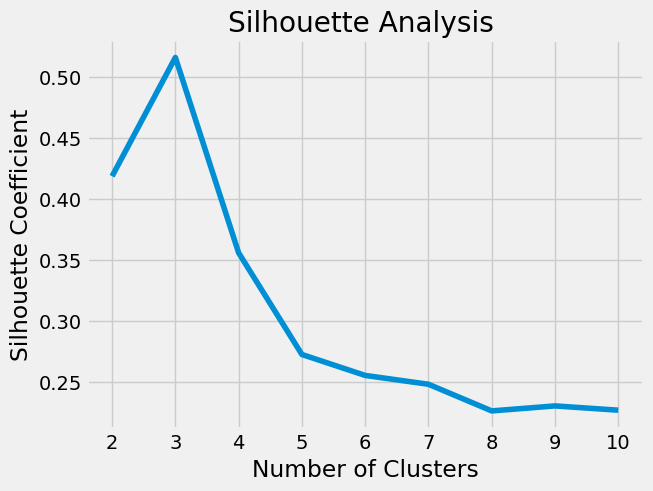

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients_credit_card)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Analysis ')
plt.show()

In [61]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_credit_card = davies_bouldin_score(scaled_features_credit_card, kmeans_credit_card.labels_)
print(f"Davies Bouldin Score for credit card data: {davies_bouldin_credit_card}")

Davies Bouldin Score for credit card data: 1.4268920922760615


In [62]:

predicted_labels_credit_card = kmeans_credit_card.predict(scaled_features_credit_card[:10])
print("Predicted labels for the first 10 credit card data points:")
print(predicted_labels_credit_card)

Predicted labels for the first 10 credit card data points:
[3 8 3 2 1 8 1 7 7 7]
